## 노인복지시설 현황

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import warnings
import os

if os.name == 'nt':
    print("This is a Windows environment.")
    rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    print("This is a Mac or Linux environment.")
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings("ignore", category=UserWarning)

This is a Mac or Linux environment.


In [2]:
welfare = pd.read_csv('./data/KC_485_DMSTC_MCST_OLDLSR_2023.csv')
welfare.head()

,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,FCLTY_LO,FCLTY_LA,OPER_INSTT_NM,TEL_NO,LC_LO,LC_LA,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
0,KC485PC23N000000000001,문화시설,복지관,1004가족복지센터,전라북도,익산시,5214011400,모현동1가,5214061000,모현동,...,126.946306,35.949725,NaN,NaN,9.500649e+05,1.772699e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
1,KC485PC23N000000000002,문화시설,복지관,1004가족재가복지센터,경기도,화성시,4159025325,봉담읍 와우리,4159025300,봉담읍,...,126.972771,37.215112,NaN,NaN,9.532215e+05,1.913051e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
2,KC485PC23N000000000003,문화시설,복지관,1004엔젤스방문요양센터,경기도,고양시 일산서구,4128710500,덕이동,4128760000,덕이동,...,126.751049,37.699774,NaN,NaN,9.339764e+05,1.966954e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
3,KC485PC23N000000000004,문화시설,복지관,100세고성재가복지센터,경상남도,고성군,4882025021,고성읍 성내리,4882025000,고성읍,...,128.321049,34.974063,NaN,NaN,1.074947e+06,1.664660e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
4,KC485PC23N000000000005,문화시설,복지관,100세노인복지센터,경상남도,진주시,4817012500,신안동,4817071500,신안동,...,128.071955,35.185477,NaN,NaN,1.052074e+06,1.687947e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231


In [3]:
welfare = welfare[welfare['CTPRVN_NM'].str.contains('서울')]
welfare['MLSFC_NM'].value_counts()

MLSFC_NM
노인정/노인회관    1492
복지관         1195
보육원/양로원      318
마을/새마을회관      51
Name: count, dtype: int64

In [4]:
welfare.drop(columns=['ID', 'LEGALDONG_CD', 'OPER_INSTT_NM', 'TEL_NO', "ORIGIN_NM", "LAST_CHG_DE", "FILE_NM",
                        'BASE_DE', 'LCLAS_NM', 'ADSTRD_CD', 'LEGALDONG_NM', 'RDNMADR_CD', 'ADSTRD_NM', 'GID_CD', 
                        "ZIP_NO", "LC_LO", "LC_LA"], inplace=True)
welfare.reset_index(drop=True, inplace=True)
welfare.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [5]:
import requests
import json

def convert_name(name):
    
    path = '/v2/local/search/keyword.json'
    api_host = 'https://dapi.kakao.com'
    api_key = '275fa9c9b83625900bee1dc000fd7dcb'
    url = api_host+path
    
    header = {
        "Authorization" : f'KakaoAK {api_key}'
    }
    
    body = {
    "format" : "json",
    'query' : name
    }

    try:
        response = requests.get(url=url, params=body, headers=header, timeout=10)  # 10초 타임아웃
        response.raise_for_status()  # HTTP 오류가 발생하면 예외 발생
    except requests.exceptions.Timeout:
        print("Request timed out")
        return {}
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return {}

    parsed_data = json.loads(response.text)

    return parsed_data

In [6]:
name_list = [] 
address_list = []
x_list = []
y_list = []
idx_list = []
null_idx_list = []
multi_idx_list = []

for idx, val in welfare.iterrows():
    name = val['FCLTY_NM']
    gu = val['SIGNGU_NM']
    data = convert_name('서울 '+gu+" "+name)
    count = data['meta']['total_count']
    
    if count == 1:
        place_name = data['documents'][0]['place_name']
        address_name = data['documents'][0]['road_address_name']
        x_value = data['documents'][0]['x']
        y_value = data['documents'][0]['y']
        
        name_list.append(place_name), address_list.append(address_name), x_list.append(x_value), y_list.append(y_value)
        idx_list.append(idx)
    elif count == 0:
        addr = val['RDNMADR_NM']
        data = convert_name(addr)
        count = data['meta']['total_count']
        
        if count == 0:
            null_idx_list.append(idx)
        
        elif count == 1:
            place_name = data['documents'][0]['place_name']
            address_name = data['documents'][0]['road_address_name']
            x_value = data['documents'][0]['x']
            y_value = data['documents'][0]['y']
            
            name_list.append(place_name), address_list.append(address_name), x_list.append(x_value), y_list.append(y_value)
            idx_list.append(idx)            
        
        else:
            added_to_list = False
            documents = data['documents']
            for i in range(len(documents)):
                category_name = documents[i]['category_name']
                keywords = ['사회복지', '노인복지', '노인정', '노인회', '요양', '마을회관', '동행정복지센터', '협회', '행정기관', '문화시설']
                if any(keyword in category_name for keyword in keywords) == True:
                    place_name = documents[i]['place_name']
                    address_name = documents[i]['road_address_name']
                    x_value = documents[i]['x']
                    y_value = documents[i]['y']
                    name_list.append(place_name), address_list.append(address_name), x_list.append(x_value), y_list.append(y_value), idx_list.append(idx)
                    added_to_list = True
                    break
            if added_to_list == False:
                null_idx_list.append(idx)
            
    else:
        added_to_list = False
        documents = data['documents']
        for i in range(len(documents)):
            category_name = documents[i]['category_name']
            keywords = ['사회복지', '노인복지', '노인정', '노인회', '요양', '마을회관', '동행정복지센터', '협회', '행정기관', '문화시설']
            if any(keyword in category_name for keyword in keywords) == True:
                place_name = documents[i]['place_name']
                address_name = documents[i]['road_address_name']
                x_value = documents[i]['x']
                y_value = documents[i]['y']
                name_list.append(place_name), address_list.append(address_name), x_list.append(x_value), y_list.append(y_value), idx_list.append(idx)
                added_to_list = True
                break
        if added_to_list == False:
            multi_idx_list.append(idx)
        
len(idx_list), len(null_idx_list), len(multi_idx_list)

(2570, 473, 13)

In [7]:
len(name_list), len(address_list), len(x_list), len(y_list)

(2570, 2570, 2570, 2570)

In [8]:
welfare.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [9]:
result = welfare.loc[idx_list]
result.loc[idx_list, 'FCLTY_NM'] = name_list
result.loc[idx_list, 'RDNMADR_NM'] = address_list
result.loc[idx_list, 'FCLTY_LO'] = x_list
result.loc[idx_list, 'FCLTY_LA'] = y_list

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_2037/3652260772.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['127.077066688023', '126.866935742365', '127.00861219666437', '127.094448962354', '126.962831241502', '126.99573994637', '126.825572260256', '126.82484861335737', '126.931456767672', '126.957617005745', '126.85017417033', '126.999272559795', '126.91256490244425', '127.08958075026007', '127.135299206571', '127.036999601764', '127.135299206571', '126.876149827249', '127.133256764435', '126.87397119177422', '127.140413017684', '127.151129173894', '127.060380107015', '127.125769474647', '127.124753390553', '127.119055415614', '127.106904080388', '127.080418159479', '126.86081283646', '126.925218515947', '126.884110707201', '126.884110707201', '126.882503111506', '126.886246947822', '126.8840488747035', '126.986642790239', '126.887626283303', '127.069764065704', '126.888706091182', '

In [10]:
result.reset_index(drop=True, inplace=True)
result

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울 중랑구 중랑역로 142,127.077066688023,37.6061293100042
1,노인정/노인회관,대원2차3차칸타빌아파트 노인정,서울특별시,강서구,서울 양천구 목동중앙로 11,126.866935742365,37.5322915786611
2,복지관,안토재가복지센터,서울특별시,중구,서울 중구 다산로 93,127.00861219666437,37.552875682542634
3,복지관,A+대한방문요양센터,서울특별시,중랑구,서울 중랑구 상봉로12길 16,127.094448962354,37.5905214299219
4,복지관,A+행복한방문요양센터,서울특별시,용산구,서울 용산구 만리재로 138-1,126.962831241502,37.5516240661188
...,...,...,...,...,...,...,...
2565,복지관,희망의집,서울특별시,강서구,서울 강서구 강서로34길 36,126.841487920742,37.5433424571914
2566,복지관,희망의집지역아동센터,서울특별시,강북구,서울 강북구 삼양로 280-1,127.01826138600413,37.62849756626493
2567,복지관,희망의학교,서울특별시,광진구,서울 광진구 천호대로 622,127.086435692246,37.5540760233142
2568,복지관,희망 재가노인복지센터,서울특별시,강서구,경기 부천시 오정구 고리울로51번길 34,126.822155029041,37.5287295433574


In [11]:
pop = pd.read_excel('./data/자치구별+고령인구(추계인구)_20241019165325.xlsx')
pop.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),고령인구,고령인구,고령인구
1,자치구별(1),자치구별(2),소계,남자,여자
2,합계,소계,1691853,749118,942735
3,NaN,종로구,27187,11986,15201
4,NaN,중구,24374,10637,13737


In [12]:
pop.drop(index=[0, 1, 2], columns=['자치구별(1)'], inplace=True)
pop.columns = ["구별", "노령인구", "노령인구_남자", "노령인구_여자"]
pop.reset_index(drop=True, inplace=True)
pop.head()

,구별,노령인구,노령인구_남자,노령인구_여자
0,종로구,27187,11986,15201
1,중구,24374,10637,13737
2,용산구,37740,16395,21345
3,성동구,47907,21034,26873
4,광진구,55697,24952,30745


In [13]:
pop_result = pop[['구별', '노령인구']]
pop_result.head()

,구별,노령인구
0,종로구,27187
1,중구,24374
2,용산구,37740
3,성동구,47907
4,광진구,55697


In [14]:
cnt = result['SIGNGU_NM'].value_counts().reset_index()
cnt.rename(columns={"SIGNGU_NM" : "구별", "count" : "개수"}, inplace=True)
cnt.head()

,구별,개수
0,강서구,161
1,양천구,140
2,영등포구,136
3,노원구,130
4,송파구,127


In [15]:
cnt_result = cnt.merge(right=pop_result, left_on='구별', right_on='구별')
cnt_result.head()

,구별,개수,노령인구
0,강서구,161,98380
1,양천구,140,73126
2,영등포구,136,70566
3,노원구,130,92104
4,송파구,127,104433


In [16]:
cnt_result['기준개수(10K)'] = cnt_result['개수'] / cnt_result['노령인구'] * 10000
cnt_result.head()

,구별,개수,노령인구,기준개수(10K)
0,강서구,161,98380,16.365115
1,양천구,140,73126,19.145037
2,영등포구,136,70566,19.272738
3,노원구,130,92104,14.114479
4,송파구,127,104433,12.160907


In [17]:
cnt_result['노령인구'] = cnt_result['노령인구'].astype('int')
cnt_result['기준개수(10K)'] = cnt_result['기준개수(10K)'].astype('float')
cnt_result.describe()

,개수,노령인구,기준개수(10K)
count,25.000000,25.000000,25.000000
mean,102.800000,67674.120000,16.310826
std,23.468063,20626.014828,5.312045
min,69.000000,24374.000000,10.474783
25%,86.000000,55483.000000,13.640497
50%,96.000000,69708.000000,14.114479
75%,119.000000,81561.000000,17.401077
max,161.000000,104433.000000,32.411586


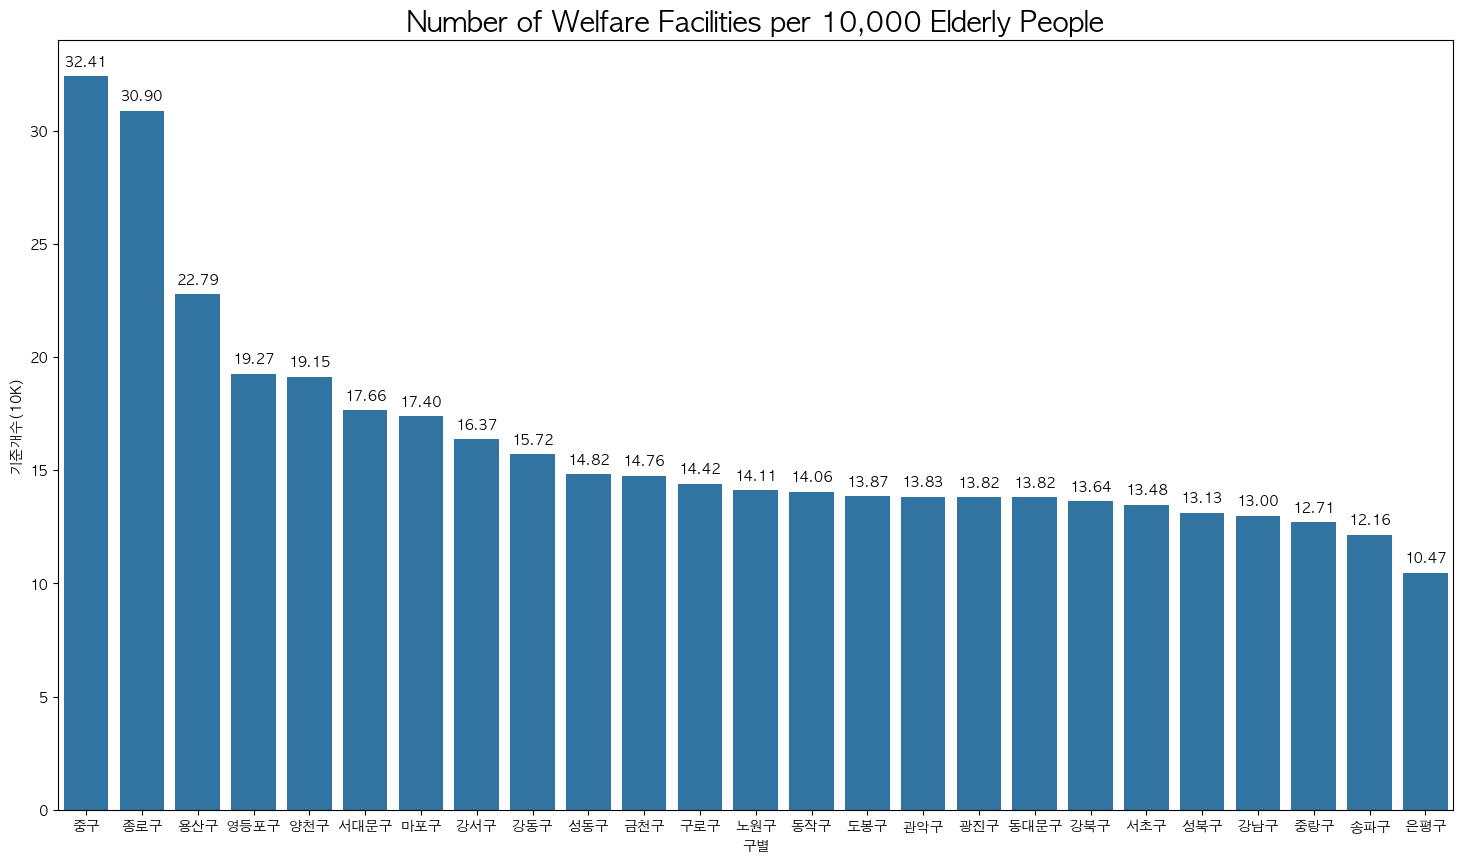

In [18]:
cnt_sorted = cnt_result.sort_values(by='기준개수(10K)', ascending=False)

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=cnt_sorted, x='구별', y='기준개수(10K)')
plt.title("Number of Welfare Facilities per 10,000 Elderly People", fontdict={'fontsize' : 20})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.show()

* 중구, 종로구, 용산구, 영등포구, 양천구 순

In [19]:
cnt_result.to_csv('./data/output/welfare_f.csv', index=False)